# Stock Analysis in R

In [1]:
options(warn=-1) #Ignore Warning

In [2]:
library(quantmod)
library(PerformanceAnalytics)

Loading required package: xts
Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Loading required package: TTR
Version 0.4-0 included new data defaults. See ?getSymbols.

Attaching package: 'PerformanceAnalytics'

The following object is masked from 'package:graphics':

    legend



In [3]:
SPY = getSymbols("SPY", from="2001-01-01", auto.assign=F)

'getSymbols' currently uses auto.assign=TRUE by default, but will
use auto.assign=FALSE in 0.5-0. You will still be able to use
'loadSymbols' to automatically load data. getOption("getSymbols.env")
and getOption("getSymbols.auto.assign") will still be checked for
alternate defaults.

This message is shown once per session and may be disabled by setting 
options("getSymbols.warning4.0"=FALSE). See ?getSymbols for details.

Please see the Warning section of '?getSymbols.yahoo' for details.

This message is shown once per session and may be disabled by setting
options("getSymbols.yahoo.warning"=FALSE).


           SPY.Open SPY.High  SPY.Low SPY.Close SPY.Volume SPY.Adjusted
2001-01-02 132.0000 132.1562 127.5625  128.8125    8737500     91.17600
2001-01-03 128.3125 136.0000 127.6562  135.0000   19431600     95.55563
2001-01-04 134.9375 135.4687 133.0000  133.5468    9219000     94.52704
2001-01-05 133.4687 133.6250 129.1875  129.1875   12911400     91.44143
2001-01-08 129.8750 130.1875 127.6875  130.1875    6625300     92.14928
2001-01-09 131.0468 131.5000 129.4218  129.8437    5702400     91.90590

In [4]:
head(SPY)

           SPY.Open SPY.High  SPY.Low SPY.Close SPY.Volume SPY.Adjusted
2001-01-02 132.0000 132.1562 127.5625  128.8125    8737500     91.17600
2001-01-03 128.3125 136.0000 127.6562  135.0000   19431600     95.55563
2001-01-04 134.9375 135.4687 133.0000  133.5468    9219000     94.52704
2001-01-05 133.4687 133.6250 129.1875  129.1875   12911400     91.44143
2001-01-08 129.8750 130.1875 127.6875  130.1875    6625300     92.14928
2001-01-09 131.0468 131.5000 129.4218  129.8437    5702400     91.90590

In [5]:
tail(SPY)

           SPY.Open SPY.High SPY.Low SPY.Close SPY.Volume SPY.Adjusted
2018-12-14   262.96   264.03  259.85    260.47  116961100     258.9578
2018-12-17   259.40   260.65  253.53    255.36  165492300     253.8775
2018-12-18   257.20   257.95  253.28    255.08  134515100     253.5991
2018-12-19   255.17   259.40  249.35    251.26  214992800     249.8012
2018-12-20   249.86   251.62  244.65    247.17  252053400     245.7350
2018-12-21   246.74   249.71  239.98    240.70  254755300     240.7000

In [13]:
summary(SPY)

     Index               SPY.Open         SPY.High        SPY.Low     
 Min.   :2001-01-02   Min.   : 67.95   Min.   : 70.0   Min.   : 67.1  
 1st Qu.:2005-07-05   1st Qu.:113.85   1st Qu.:114.6   1st Qu.:113.0  
 Median :2009-12-29   Median :131.79   Median :132.7   Median :131.0  
 Mean   :2009-12-29   Mean   :150.91   Mean   :151.8   Mean   :150.0  
 3rd Qu.:2014-06-26   3rd Qu.:190.03   3rd Qu.:191.6   3rd Qu.:188.3  
 Max.   :2018-12-21   Max.   :293.09   Max.   :293.9   Max.   :291.8  
   SPY.Close        SPY.Volume         SPY.Adjusted   
 Min.   : 68.11   Min.   :  3303100   Min.   : 55.54  
 1st Qu.:113.77   1st Qu.: 52539350   1st Qu.: 87.26  
 Median :131.87   Median : 90823300   Median :108.34  
 Mean   :150.91   Mean   :120251239   Mean   :130.28  
 3rd Qu.:190.11   3rd Qu.:159652925   3rd Qu.:175.84  
 Max.   :293.58   Max.   :871026300   Max.   :290.56  

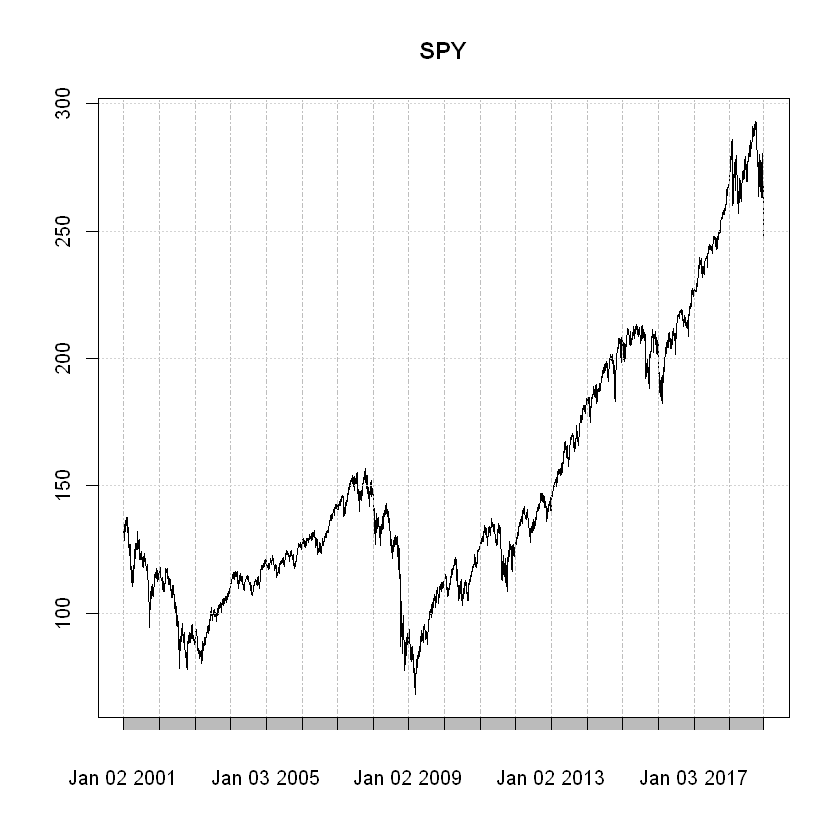

In [6]:
plot(SPY)

In [8]:
# Calculate Returns
rets = ROC(Cl(SPY), type="discrete")

In [16]:
# Another way to calculate returns
returns <- Return.calculate(Cl(SPY))
head(returns)

              SPY.Close
2001-01-02           NA
2001-01-03  0.048034934
2001-01-04 -0.010764452
2001-01-05 -0.032642482
2001-01-08  0.007740687
2001-01-09 -0.002640776

In [10]:
head(rets)

              SPY.Close
2001-01-02           NA
2001-01-03  0.048034934
2001-01-04 -0.010764452
2001-01-05 -0.032642482
2001-01-08  0.007740687
2001-01-09 -0.002640776

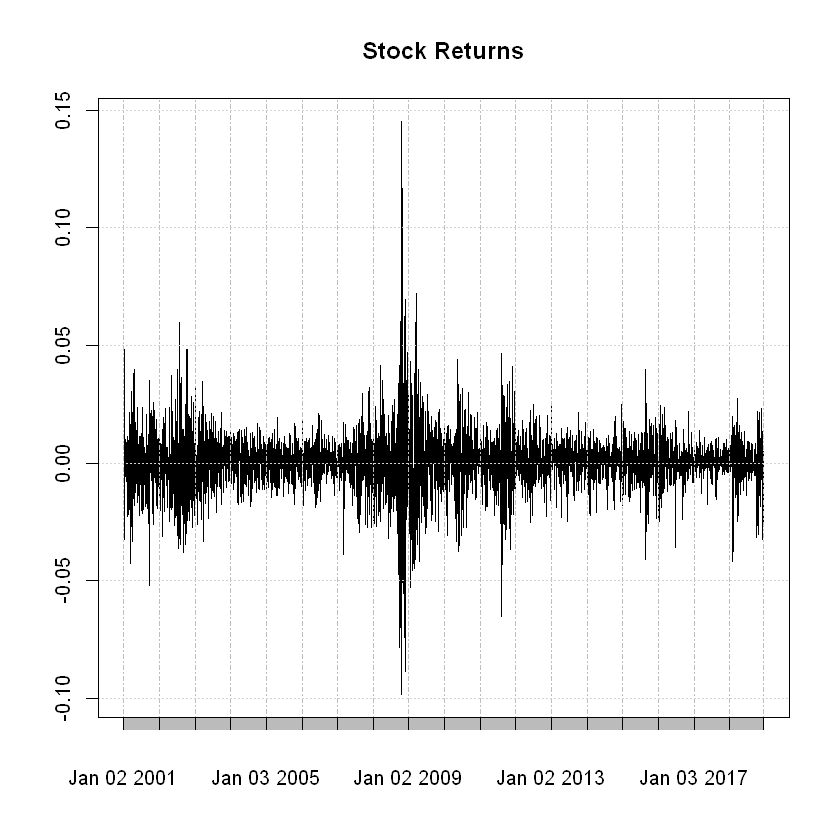

In [21]:
plot(rets, main="")
title(main='Stock Returns', cex=1.5, font=4)

In [12]:
table.Drawdowns(rets["2008/"], top=10)

From,Trough,To,Depth,Length,To Trough,Recovery
2008-01-02,2009-03-09,2012-09-13,-0.5342,1186,298,888
2018-09-21,2018-12-21,NA,-0.1801,65,64,NA
2015-05-22,2016-02-11,2016-07-12,-0.1435,287,183,104
2018-01-29,2018-04-02,2018-08-24,-0.1016,146,44,102
2012-09-17,2012-11-15,2013-01-17,-0.0784,84,42,42
2014-09-19,2014-10-16,2014-11-05,-0.0770,34,20,14
2013-05-22,2013-06-24,2013-07-11,-0.0605,35,23,12
2014-01-02,2014-02-03,2014-02-24,-0.0570,36,22,14
2014-12-08,2014-12-16,2014-12-26,-0.0485,14,7,7
2016-08-16,2016-11-04,2016-11-21,-0.0481,69,58,11
